#  About the Author

**👤 Name:** Muhammad Umer  
**🔗 LinkedIn:** [https://www.linkedin.com/in/therealumerhayat/](https://www.linkedin.com/in/therealumerhayat/)  
**📧 Gmail:** umerhayat282@gmail.com  
**📞 Contact Number:** +92 302 9854427 / +92 317 6239577

****

#  1. Understanding the Problem 

**Problem Statement**

In today's digital recruitment landscape, organizations receive large volumes of resumes, some of which may contain misleading or inappropriate content. The ability to automatically flag such resumes can significantly reduce the manual workload of recruiters and improve the quality of the candidate selection process.

In this project, we aim to build a Naive Bayes classification model that predicts whether a given resume text should be flagged or not flagged. The training dataset consists of 125 resumes, including 33 flagged and 92 non-flagged samples.


**Business Case**

Automated resume screening has become essential for efficient and scalable recruitment. However, resumes with red flags such as exaggerated claims, inappropriate language, or irrelevant content can slip through traditional filters. By training a text classification model to identify these flagged resumes, organizations can:


- Reduce recruiter time spent on manual screening

- Improve hiring quality by catching problematic resumes early

- Streamline the recruitment pipeline using AI-driven insights

- Ensure consistency and fairness in resume evaluation



This project lays the foundation for an intelligent, automated resume screening tool that helps recruiters focus on high-quality candidates.

#  2. Import liabraries and Dataset

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
dataset = pd.read_csv("/kaggle/input/resume/resume.csv", encoding = 'latin-1')
dataset

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [4]:
dataset = dataset[['resume_text', 'class']]
dataset

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


In [5]:
dataset.head()

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged


In [6]:
dataset.tail()

,resume_text,class
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged
124,\rResearch and Development Scientist - Burling...,not_flagged


#  3. Checking Data

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [8]:
dataset.isnull().sum() / len(dataset)

resume_text    0.0
class          0.0
dtype: float64

In [10]:
dataset['class'].value_counts()

class
not_flagged    92
flagged        33
Name: count, dtype: int64

In [11]:
dataset['class'] = dataset['class'].apply(lambda x:1 if x == 'flagged' else 0)
dataset

/tmp/ipykernel_35/2769710800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['class'] = dataset['class'].apply(lambda x:1 if x == 'flagged' else 0)


,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


#  4. Perform Data Cleaning 

In [14]:
dataset['resume_text'] = dataset['resume_text'].apply(lambda x: x.replace('\r', ''))
dataset

/tmp/ipykernel_35/115097432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['resume_text'] = dataset['resume_text'].apply(lambda x: x.replace('\r', ''))


,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1
...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0
121,Research and Teaching Assistant - University o...,0
122,Medical Coder - Highly Skilled - Entry LevelSu...,0
123,Waterbury VT - Email me on Indeed: indeed.com/...,1


In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'use', 'email', 'com'])

In [23]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)

In [24]:
dataset['cleaned_txt'] = dataset['resume_text'].apply(preprocess)
dataset

,resume_text,class,cleaned_txt
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
...,...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...
123,Waterbury VT - Email me on Indeed: indeed.com/...,1,waterbury bec fcwilling relocate work employer...


In [26]:
print(dataset['resume_text'][0])
print(dataset['cleaned_txt'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance¢ Supervise customer service team of a popular catalog company¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction¢ Troubleshoot order and shipping issues: lost in transit order errors damages¢ Manage and resolve escalated customer calls to ensure customer satisfaction¢ Assist customers with order placing cross-selling/upselling of catalog merchandise¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - 

#  5. Data Visualization

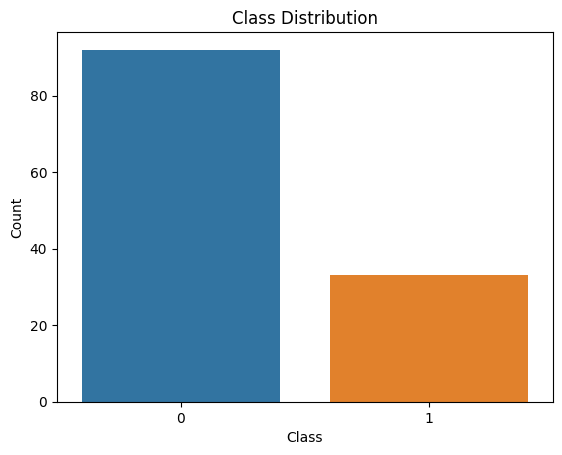

In [37]:
sns.countplot(x='class', data=dataset)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

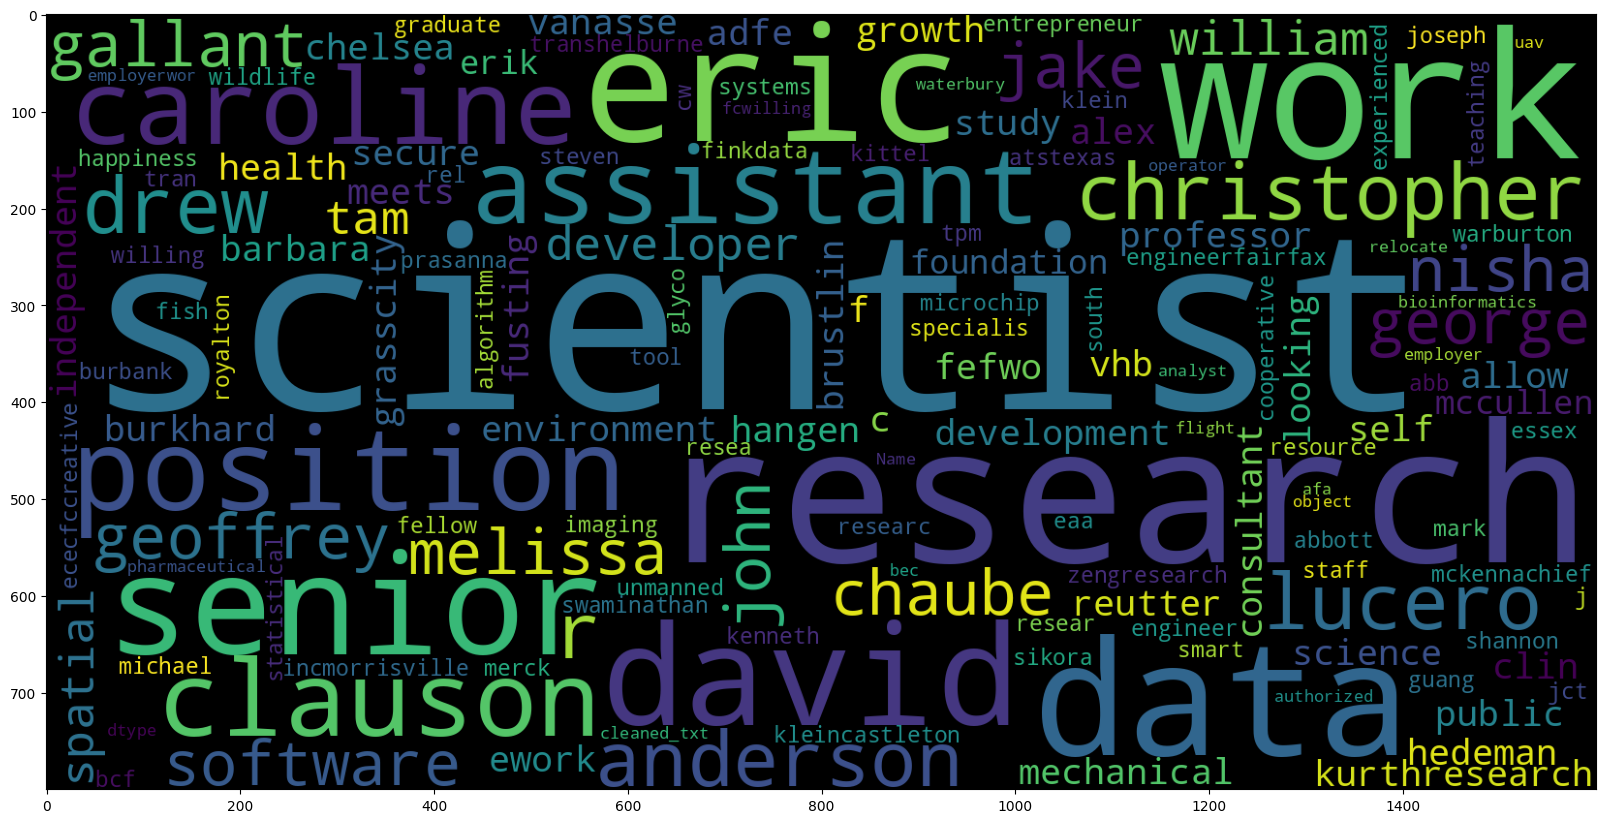

In [39]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(dataset[dataset['class'] == 1].cleaned_txt))
plt.imshow(wc)

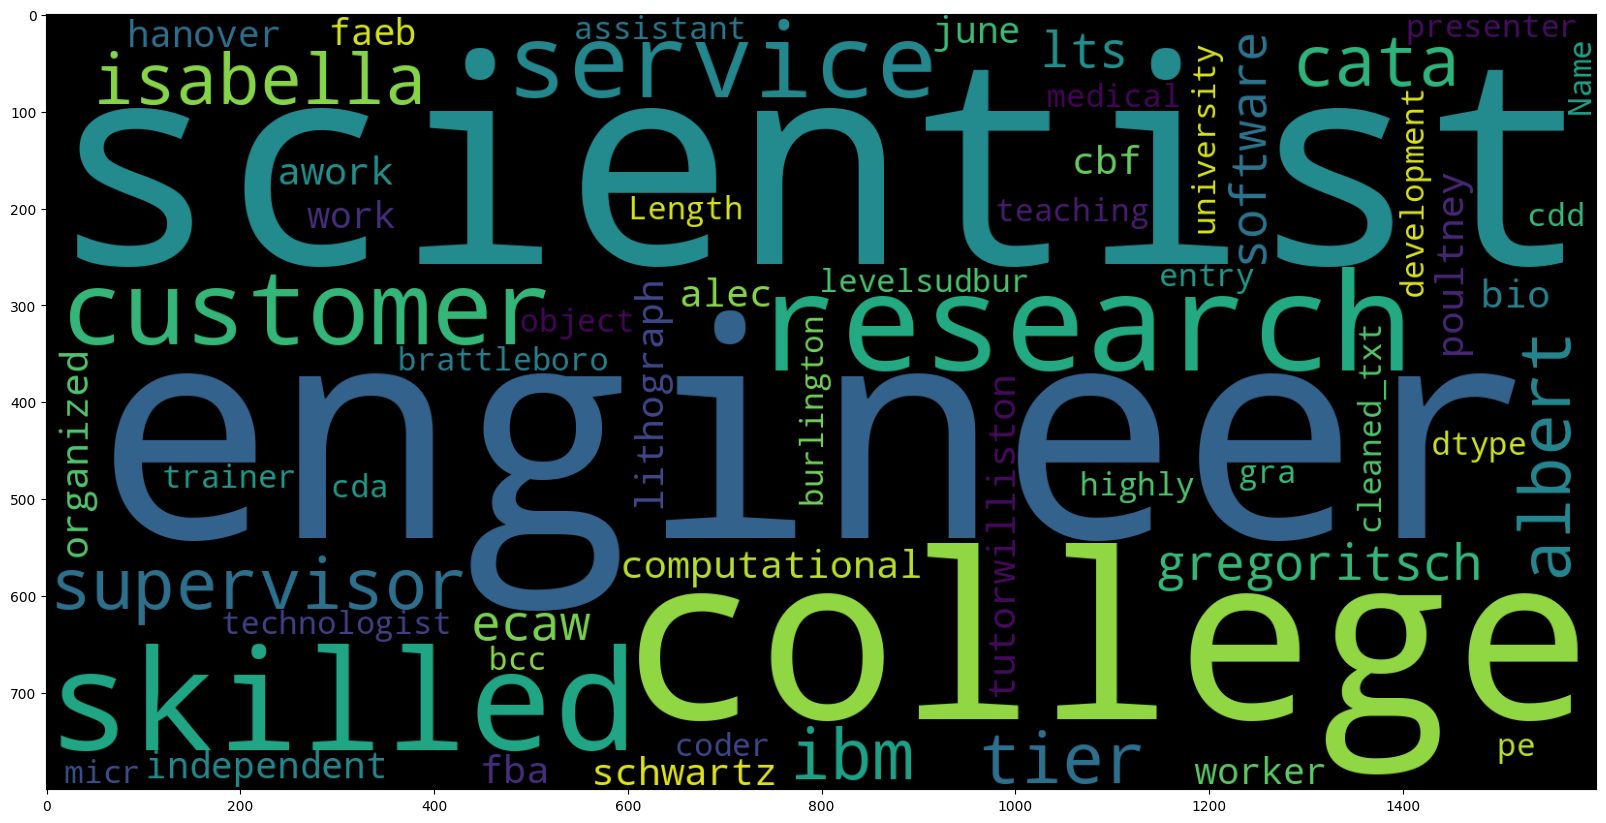

In [40]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(dataset[dataset['class'] == 0].cleaned_txt))
plt.imshow(wc)

#  6. Prepare dataset applying countvectorizer

In [52]:
vectorizer = CountVectorizer()

In [54]:
cv = vectorizer.fit_transform(dataset['cleaned_txt'])

In [56]:
print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [57]:
print(cv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 7. Train Model

In [59]:
X  = cv
y = dataset['class']

In [60]:
X.shape

(125, 11315)

In [61]:
y.shape

(125,)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# 8. Evaluate the Model

<Axes: >

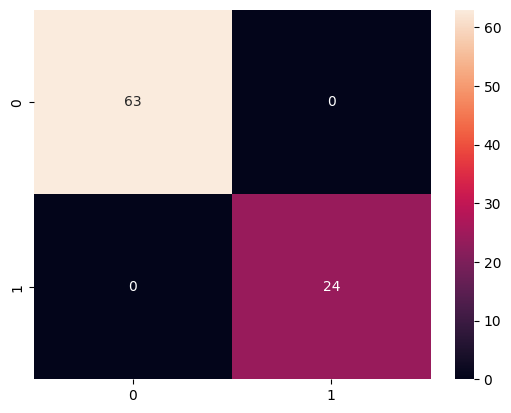

In [83]:
y_pred_train = NB_classifier.predict(X_train)
y_pred_train

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True)

<Axes: >

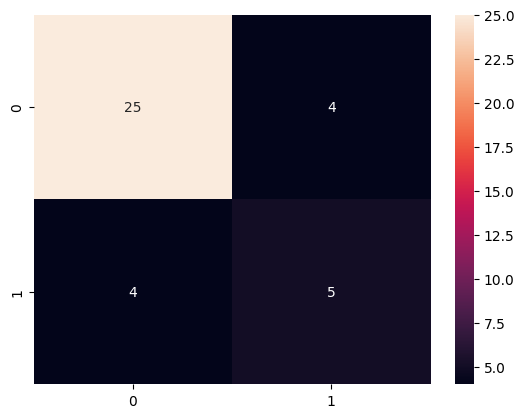

In [84]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [85]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.56      0.56      0.56         9

    accuracy                           0.79        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.79      0.79      0.79        38



**Conclusion**
 
In this project, I built a Naive Bayes model to classify resumes as flagged or non-flagged. Since the dataset is small  only 125 resumes with 33 flagged and 92 non-flagged  the model's performance is limited by the lack of data and class imbalance.

I believe that with a larger and more balanced dataset, the model could achieve better accuracy and generalization. I also considered using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to address the imbalance. However, this could potentially introduce bias, as synthetic data may not fully reflect real-world variations.

In the future, I plan to explore more advanced models and gather a larger dataset to improve the results.